In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler


from imblearn.under_sampling import RandomUnderSampler


from sklearn.tree import export_graphviz
import seaborn as sns
 

In [3]:
dataSetIndex = 6 
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))
  

X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))


dataSetResultDirectory = "./"
dataSetResultDirectory += ("DatasetResults_MLP_Preprocessing")
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)



Shape of fileData: (37079, 40)
Column Headings: Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte',
       'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Segmented-Neutrophils', 'Hematocrit', 'Albumin',
       'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'Iron',
       'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke',
       'CoronaryHeartDisease'],
      dtype='object')
Number of Records: 37079


columns of x:: 39 

 and features of X: Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte',
       'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Plat

Top 20 features based on correlation:
Cholesterol            Total-Cholesterol        0.983762
Total-Cholesterol      Cholesterol              0.983762
Hemoglobin             Hematocrit               0.965886
Hematocrit             Hemoglobin               0.965886
Lymphocyte             Segmented-Neutrophils    0.936228
Segmented-Neutrophils  Lymphocyte               0.936228
Weight                 Body-Mass-Index          0.873545
Body-Mass-Index        Weight                   0.873545
Red-Blood-Cells        Hematocrit               0.814239
Hematocrit             Red-Blood-Cells          0.814239
Glucose                Glycohemoglobin          0.786788
Glycohemoglobin        Glucose                  0.786788
ALT                    AST                      0.768394
AST                    ALT                      0.768394
Hemoglobin             Red-Blood-Cells          0.742316
Red-Blood-Cells        Hemoglobin               0.742316
Gender                 Height                   0.

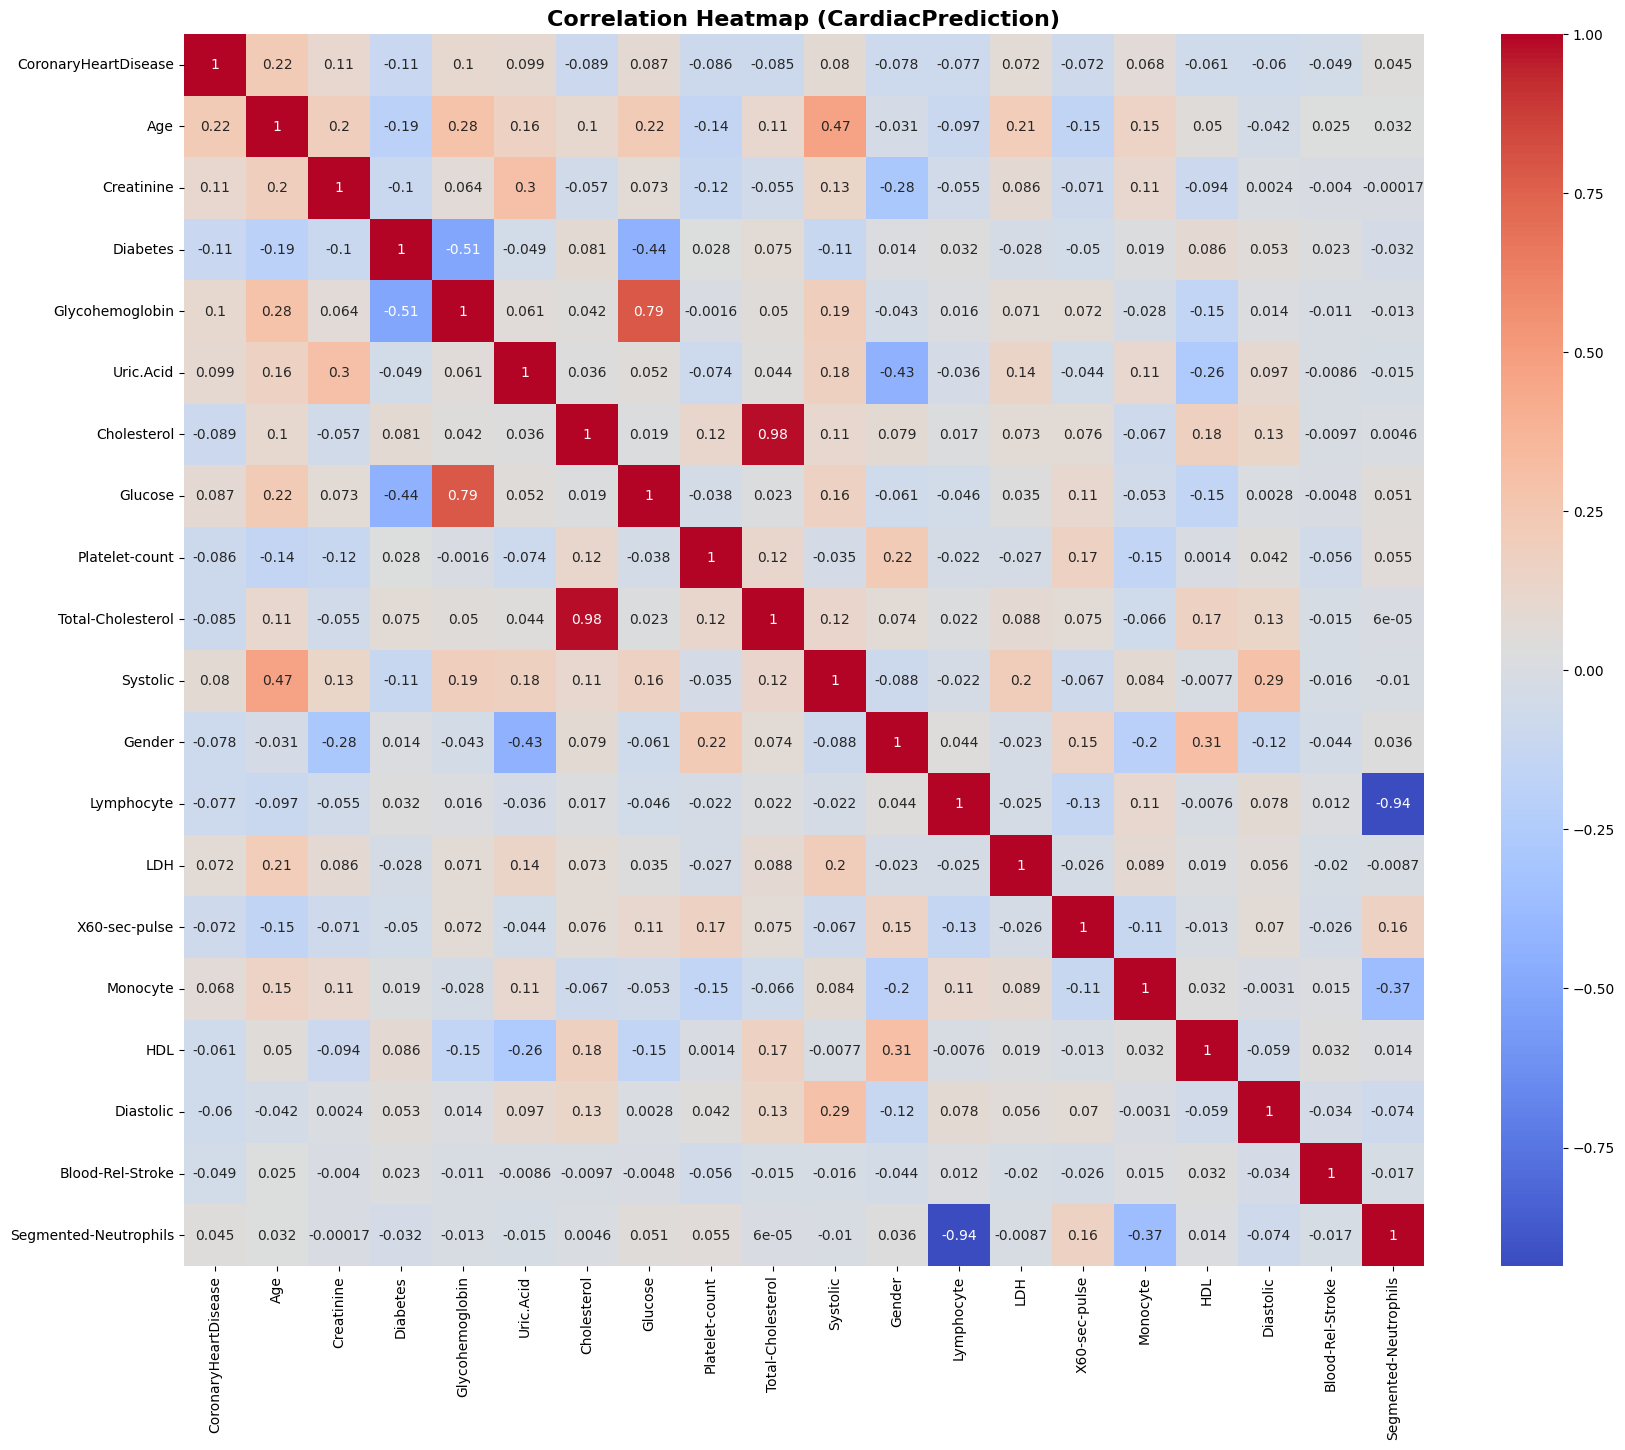

In [4]:
def makeCorrelationPic(correlationMatrix, numberOfTopFeatures, targetColumnName):     
    correlation_values = correlationMatrix.abs()
    sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
    sorted_correlation = sorted_correlation[sorted_correlation != 1.0]

    num_features = numberOfTopFeatures  # Number of top features to display
    top_features = sorted_correlation.head(num_features)
    print("Top", num_features, "features based on correlation:")
    print(top_features)
 
    top_features = correlationMatrix.abs().nlargest(numberOfTopFeatures, targetColumnName)[targetColumnName].index
    top_correlation_matrix = correlationMatrix.loc[top_features, top_features]

    mplot.figure(figsize=(20, 16)) 
    sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
    # Set the title of the plot
    mplot.title('Correlation Heatmap ({})'.format(dataSetName)  ,fontsize=16, fontweight='bold')
    
    picturePath = "{}0.1_Correlation_Matrix_DateSetName_{}.png".format(dataSetResultDirectory, dataSetName)
    print(picturePath)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    mplot.show()
    mplot.close()
    
# Calculate the correlation matrix 
correlation_matrix = fileData.corr()
#makeCorrelationPic(correlation_matrix, 15, 'CoronaryHeartDisease') 

makeCorrelationPic(correlation_matrix, 20, fileData.__dataframe__().column_names()[-1] ) 

In [5]:
print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)
 

print("Target Column Name:: {} \n".format(fileData.__dataframe__().column_names()[-1]))

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_, y_train_ = rus.fit_resample(X_train, y_train)
X_test_, y_test_ = rus.fit_resample(X_test, y_test)
'''

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

'''

# Print the class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_).value_counts())




print("\n X Train: Shape:: {}".format(X_train_.shape))
print(" X Test: Shape:: {}".format(X_test_.shape))
 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test_)



instance = np.array(X_test_)  # Example: explaining the first instance in the dataset
 
dataSetResultDirectory += ("Dataset_Exploration_" + dataSetName)
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += " {}".format(fileData.shape)


Shape of fileData: (37079, 40) , target Len:37079
X: (37079, 39) , Y:(37079,)
Target Column Name:: CoronaryHeartDisease 

Class distribution after undersampling:
CoronaryHeartDisease
0    1056
1    1056
Name: count, dtype: int64

 X Train: Shape:: (2112, 39)
 X Test: Shape:: (904, 39)


In [6]:
dt = fileData

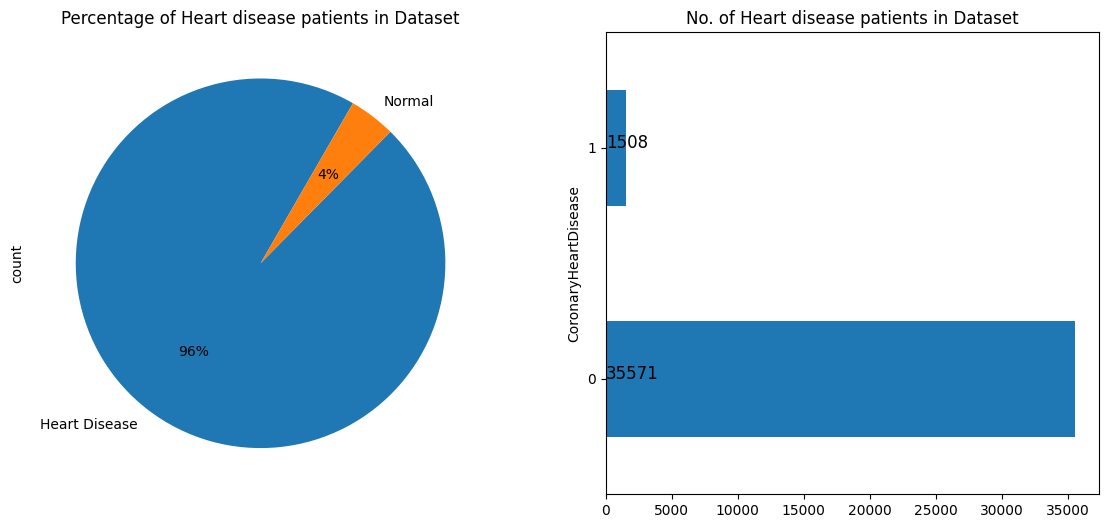

In [7]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['CoronaryHeartDisease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["CoronaryHeartDisease"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["CoronaryHeartDisease"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
 

picturePath = "{}DataSet_Exploration_No_Heart_Patients_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight') 

plt.show()

C:\Users\mubi\AppData\Local\Temp\ipykernel_20060\3491084430.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(dt['Age'], rug=True)


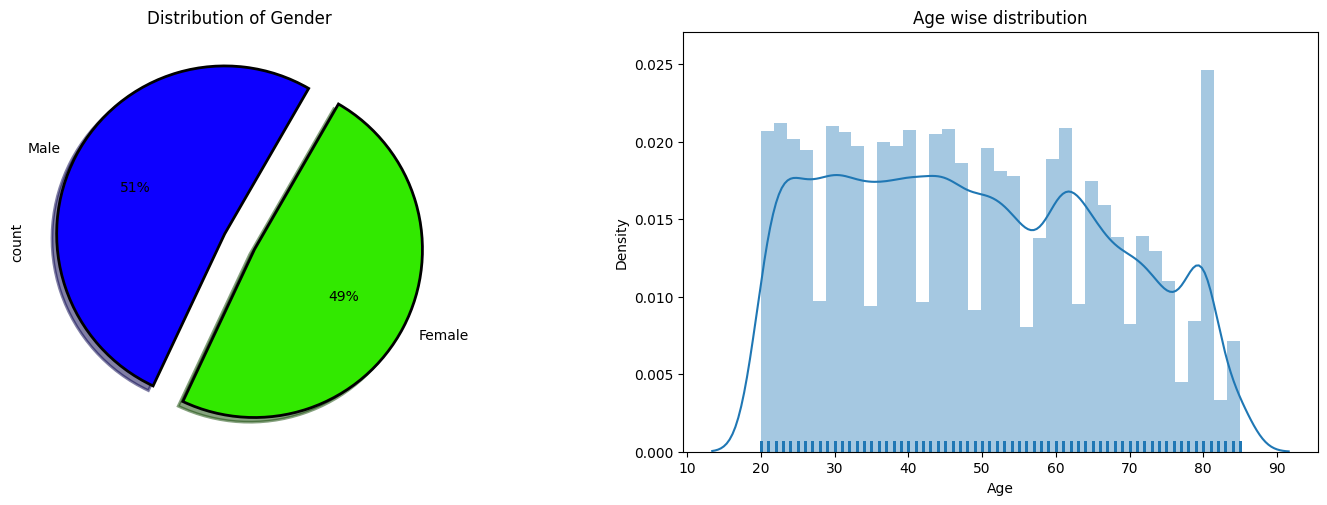

In [8]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["Gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['Age'], rug=True)
plt.title("Age wise distribution")
picturePath = "{}DataSet_Exploration_Age wise distribution_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight') 
plt.show()

<Axes: title={'center': 'Correlation of Heart Disease'}>

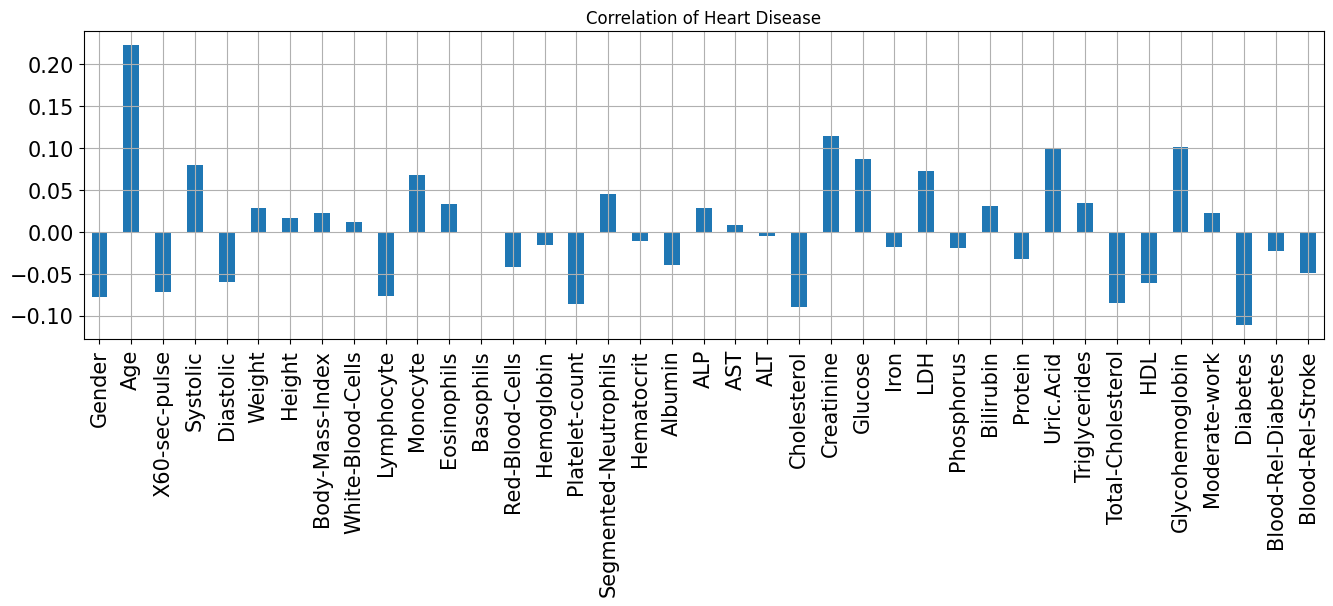

In [10]:
X.corrwith(Y).plot.bar( figsize = (16, 4), title = "Correlation of Heart Disease", fontsize = 15, rot = 90, grid = True)

In [9]:
# creating separate df for normal and heart patients

attr_1=dt[dt['CoronaryHeartDisease']==1]

attr_0=dt[dt['CoronaryHeartDisease']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['Gender'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['Age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Gender'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()


picturePath = "{}DataSet_Exploration_Age wise distribution2_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight') 

C:\Users\mubi\AppData\Local\Temp\ipykernel_20060\4013196973.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr_0['Age'])
C:\Users\mubi\AppData\Local\Temp\ipykernel_20060\4013196973.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(attr_0['Gender'], palette='viridis')


KeyboardInterrupt: 

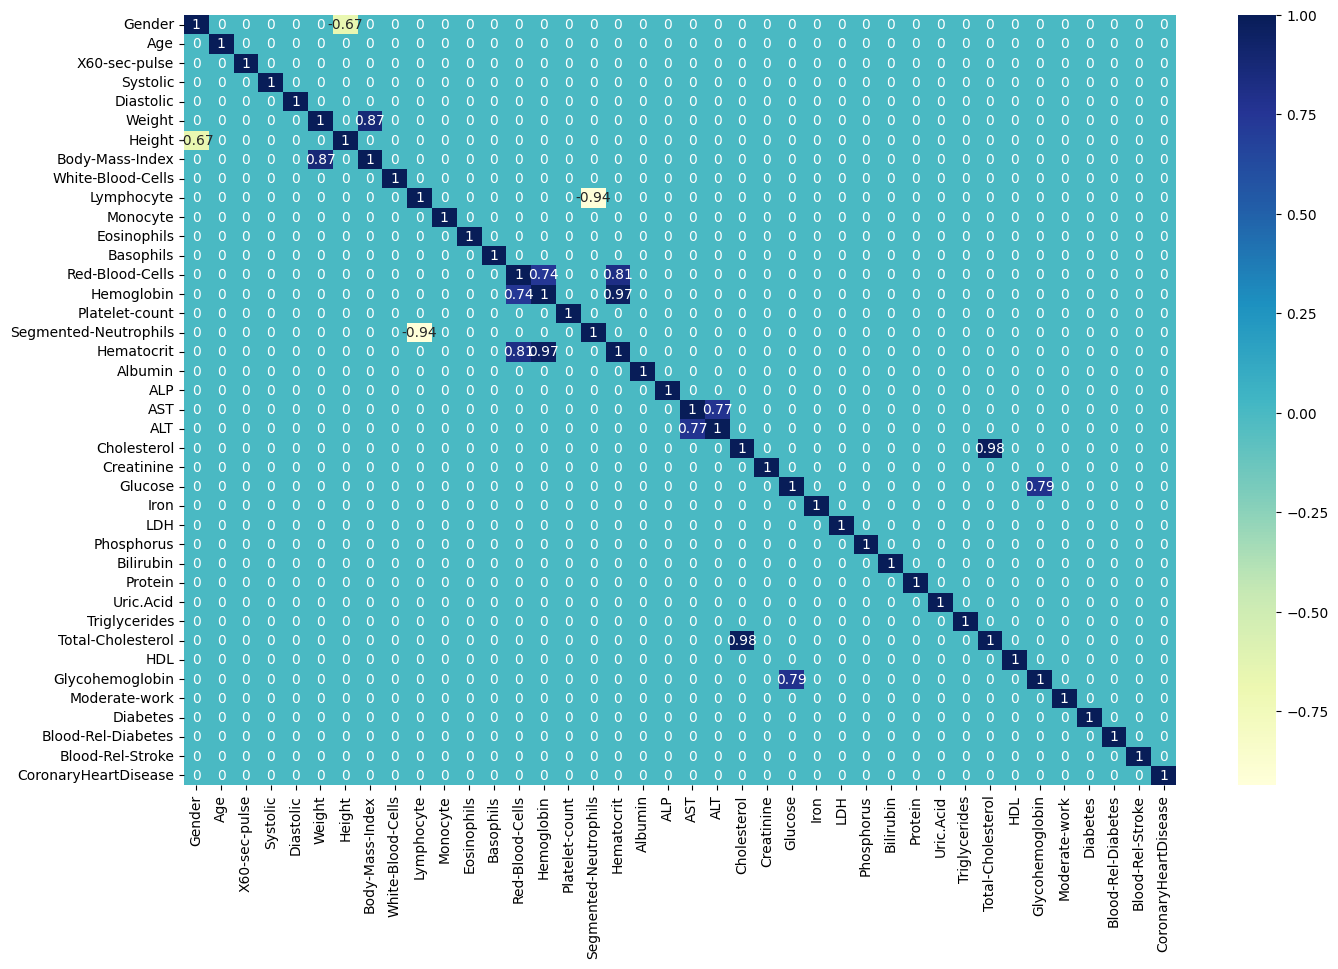

In [11]:
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
corr = dt.corr()
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()